In [113]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarning caused by Pandas v2.1.0
warnings.filterwarnings('ignore', category=FutureWarning)
movies_df = pd.read_csv('movies.csv')

# Set global plot styles
sns.set_theme()
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 600
plt.rcParams['axes.titlecolor'] = '#333'
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 200
plt.rcParams['axes.labelcolor'] = '#888'
plt.rcParams['legend.framealpha'] = 0.5

# Constants
MOVIE_TITLE = 'Movie Title'
AWARD_WINS = 'Award Wins'
TOTALS = r'Total Awards and Nominations'
AWARD_NOMS = 'Award Nominations'
OSCAR_WINS = 'Oscar Wins'
BOX_OFFICE = 'Box Office'
BOX_OFFICE_MIL = 'Box Office Earnings in Millions'
RUNTIME = 'Runtime'
RUNTIME_MINS = 'Movie Runtime in Minutes'
TO_MIL = movies_df[BOX_OFFICE] / 1000000

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 1/4</small>
### What was the runtime for each movie?

I loaded the dataset and identified the relevant columns: "Movie Title" and "Runtime". Considering the text length of the titles compared to the runtime, I chose to go with a horizontal bar chart. I sorted the data by runtime and then plotted the data. Shindler's List was the longest movie at 195 minutes and The Artist was the shortest at 100 minutes.

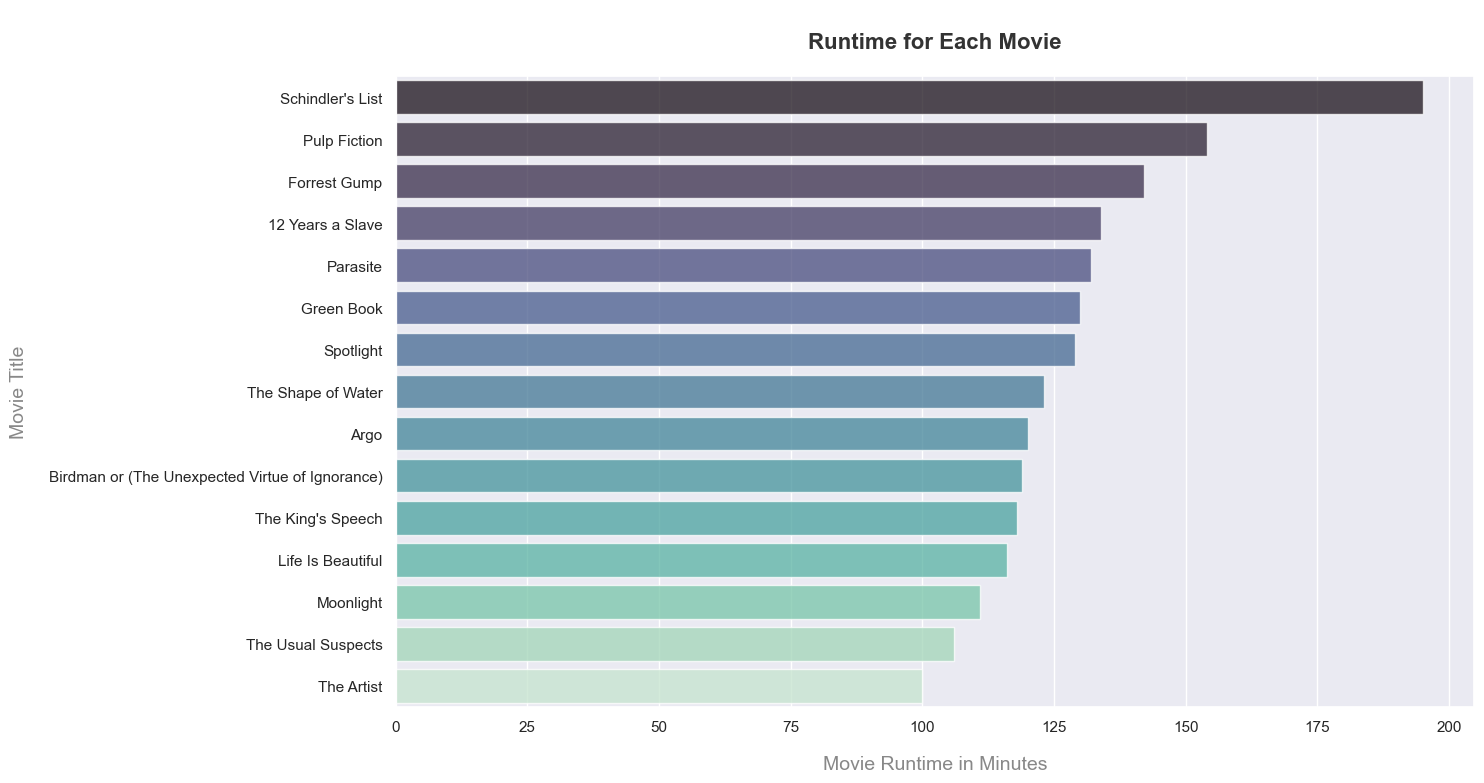

In [114]:
sorted_movies_df = movies_df.sort_values(by=RUNTIME, ascending=False)

plt.figure(figsize=(15, 8))
runtime_plot_sorted = sns.barplot(y=MOVIE_TITLE, x=RUNTIME,
                                  data=sorted_movies_df,
                                  palette='mako', alpha=0.75)
plt.title('\nRuntime for Each Movie')
plt.xlabel(RUNTIME_MINS)
plt.tight_layout()
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 2/4</small>
### What movie had the longest runtime?

Based on the above horizontal bar chart, the movie with the longest runtime is **Shindler's List** at **195 minutes**.

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 3/4</small>
### Is there any relationship between the length of the movie (runtime) and the number of awards a movie won?

To analyze the relationship between the movie's runtime and the number of awards it won, I created a scatter plot with "Runtime" on the x-axis and "Award Wins" on the y-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The chart shows a weak negative correlation between the movie's runtime and number of awards it won. As the runtime of a movie increases, there's a slight tendency for it to win fewer awards, but the relationship is not strong. This is a good case to demonstrate that *"correlation doesn't equal causation"*.

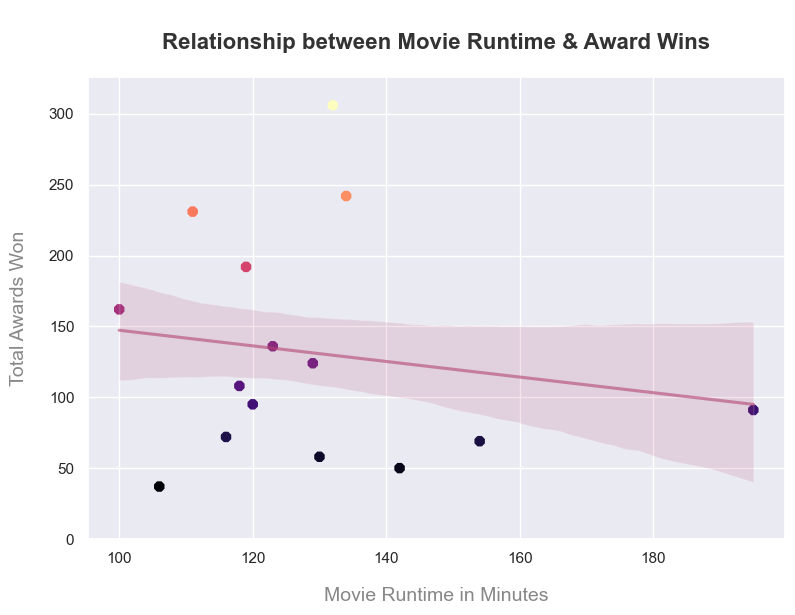

In [115]:
y_upper_limit = movies_df[AWARD_WINS].max() + 20

fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(movies_df[RUNTIME], movies_df[AWARD_WINS],
                     c=movies_df[AWARD_WINS],
                     cmap='magma', s=50, marker='8')
sns.regplot(x=RUNTIME, y=AWARD_WINS, data=movies_df, scatter=False,
            line_kws={'color':'#B34573', 'alpha':0.6}, ax=ax, ci=75)
ax.set_ylim(0, y_upper_limit)
ax.set_title('\nRelationship between Movie Runtime & Award Wins')
ax.set_xlabel(RUNTIME_MINS)
ax.set_ylabel('Total Awards Won')
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Meets 4/4</small>
### How many awards and nominations did each movie receive?

The stacked bar chart below displays the total awards and nominations received by each movie. From the chart, I can see that **12 Years a Slave**(579) has the highest combined total of award wins and nominations, while **The Usual Suspects**(54) has the lowest combined total in the dataset.

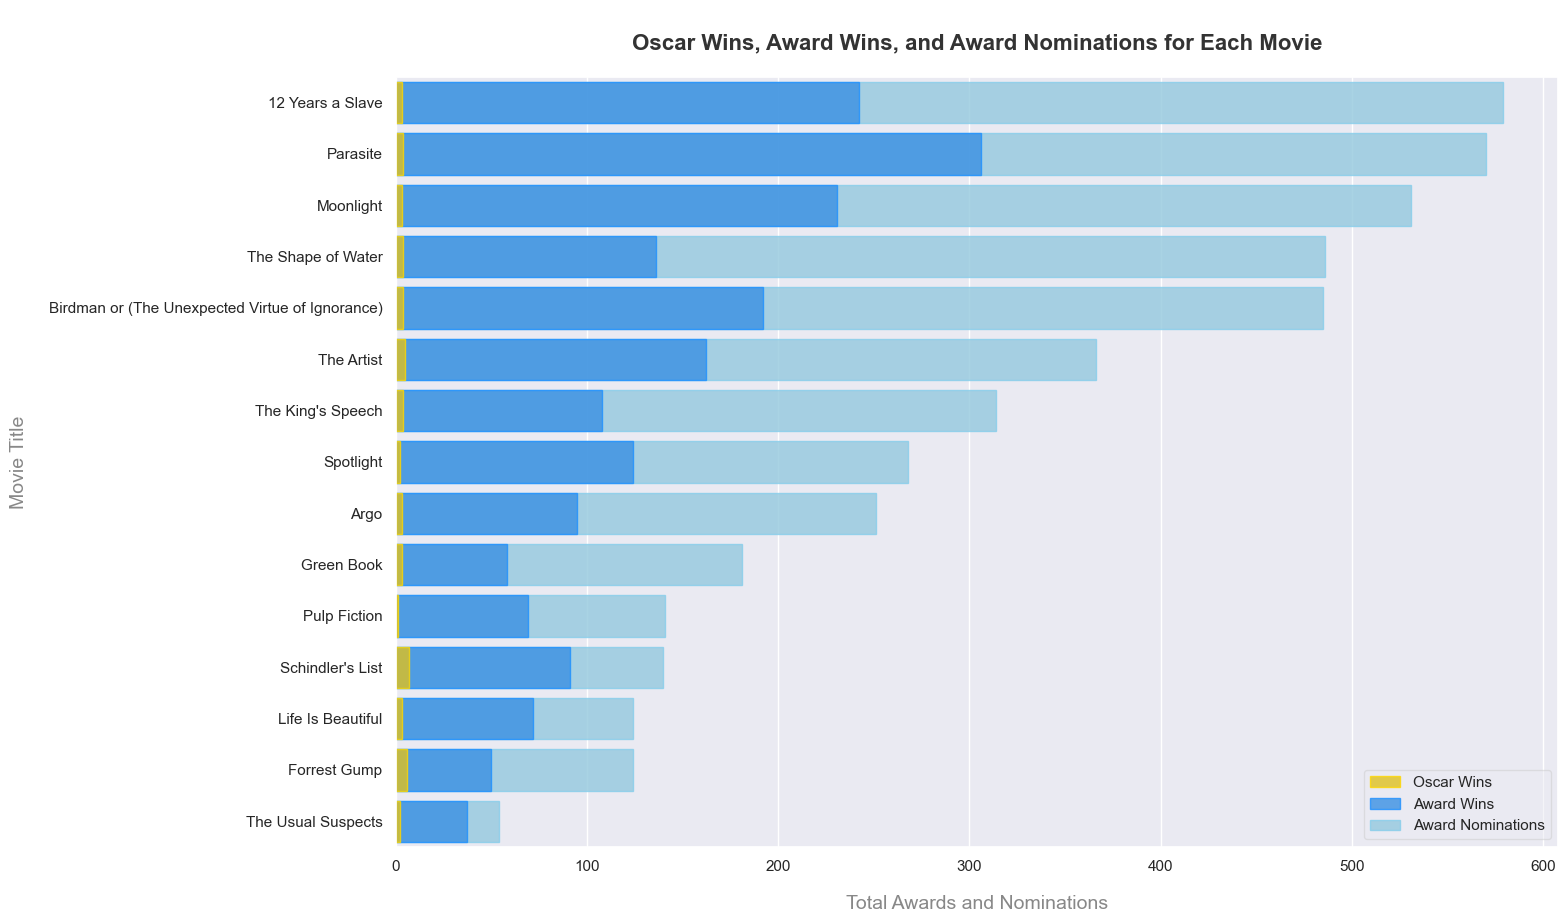

In [116]:
movies_df[TOTALS] = movies_df[AWARD_WINS] + movies_df[AWARD_NOMS]
movies_df_sorted = movies_df.sort_values(by=TOTALS, ascending=False)

plt.figure(figsize=(15, 10))
colors = ['skyblue', 'dodgerblue', 'gold']
labels = [AWARD_NOMS, AWARD_WINS, OSCAR_WINS]
cols = [TOTALS, AWARD_WINS, OSCAR_WINS]

for col, color, label in zip(cols, colors, labels):
    sns.barplot(data=movies_df_sorted, y=MOVIE_TITLE, x=col, color=color,
                label=label, edgecolor=color, alpha=0.8)

plt.xlabel(TOTALS)
plt.ylabel(MOVIE_TITLE)
plt.title('\nOscar Wins, Award Wins, and Award Nominations for Each Movie')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc='lower right')
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 1/4</small>
### Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received (total nominations = awards wins + award nominations)?

To analyze the relationship between box office earnings and total nominations, I created a scatter plot with "Box Office Earnings" on the y-axis and "Total Nominations" on the x-axis. I also used Seaborn's regplot as it fits a regression line into the chart, helping to visualize any potential relationship.<br><br>

The chart indicates a weak negative linear relationship between total nominations and box office earnings. As the number of total nominations for a movie increases, its box office earnings tend to decrease slightly. The movie Forrest Gump is a significant outlier with much higher box office earnings than the other movies in the dataset, which may be slightly skewing the correlation.

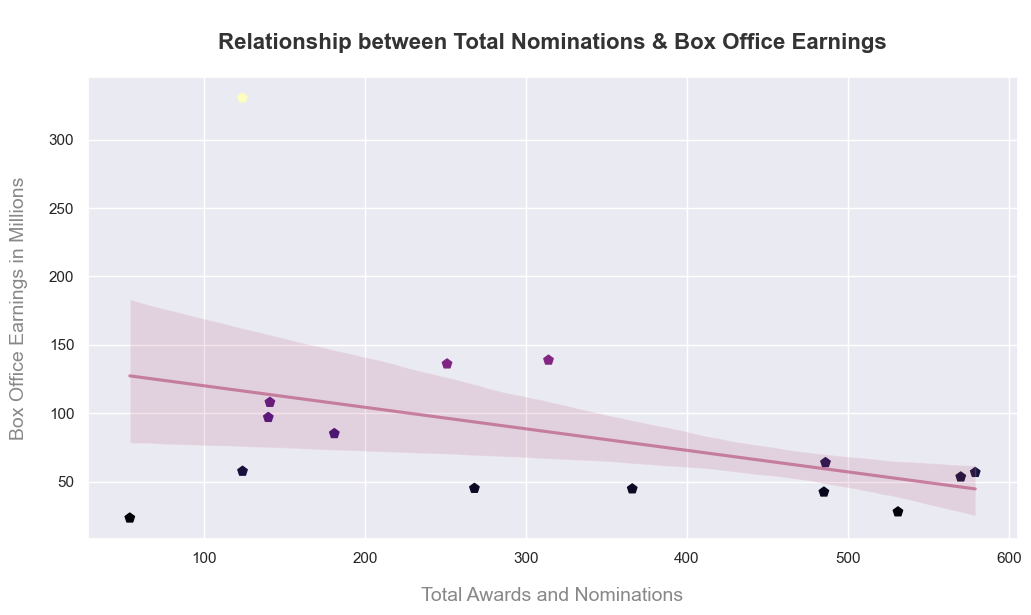

In [117]:
movies_df[BOX_OFFICE_MIL] = TO_MIL
movies_df[TOTALS] = movies_df[AWARD_WINS] + movies_df[AWARD_NOMS]

fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(movies_df[TOTALS], movies_df[BOX_OFFICE_MIL],
                     c=movies_df[BOX_OFFICE_MIL],
                     cmap='magma', s=50, marker='p')
sns.regplot(x=TOTALS, y=BOX_OFFICE_MIL, data=movies_df, scatter=False,
            line_kws={'color':'#B34573', 'alpha':0.6}, ax=ax, ci=75)
ax.set_title('\nRelationship between Total Nominations & Box Office Earnings')
ax.set_xlabel(TOTALS)
ax.set_ylabel(BOX_OFFICE_MIL)
plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 2/4</small>
### Is there a relationship between box office earnings and movie runtimes?

The regression line in the chart below shows a positive slope, indicating a positive correlation between runtime and box office earnings. This suggests that, in general, as runtime increases, box office earnings also increase.

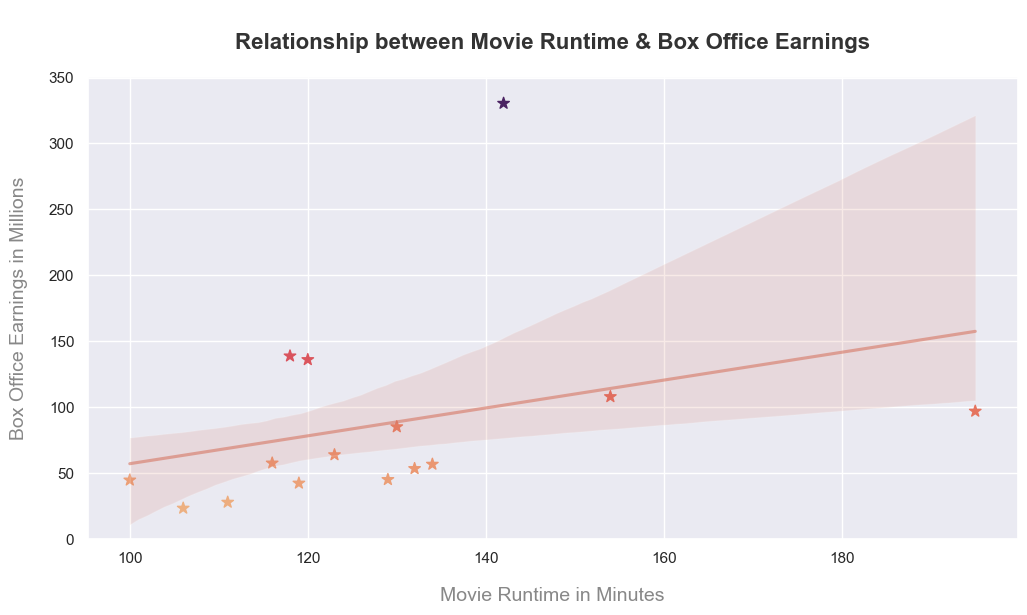

In [118]:
y_upper_limit = movies_df[BOX_OFFICE_MIL].max() + 20

fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(movies_df[RUNTIME], movies_df[BOX_OFFICE_MIL],
                     c=movies_df[BOX_OFFICE_MIL],
                     cmap='flare', s=75, marker='*')
sns.regplot(x=RUNTIME, y=BOX_OFFICE_MIL, data=movies_df, scatter=False,
            line_kws={'color':'#D67663', 'alpha':0.6}, ax=ax, ci=75)
ax.set_ylim(0, y_upper_limit)
ax.set_title('\nRelationship between Movie Runtime & Box Office Earnings')
ax.set_xlabel(RUNTIME_MINS)
ax.set_ylabel(BOX_OFFICE_MIL)
plt.show()


<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 3/4</small>
### How much did each movie earn at the box office?

The horizontal bar chart below shows the box office earnings for each movie in the dataset. **Forrest Gump** earned the most at the box office with **$330,455,270**, while **The Usual Suspects** earned the least with **$23,341,568**.

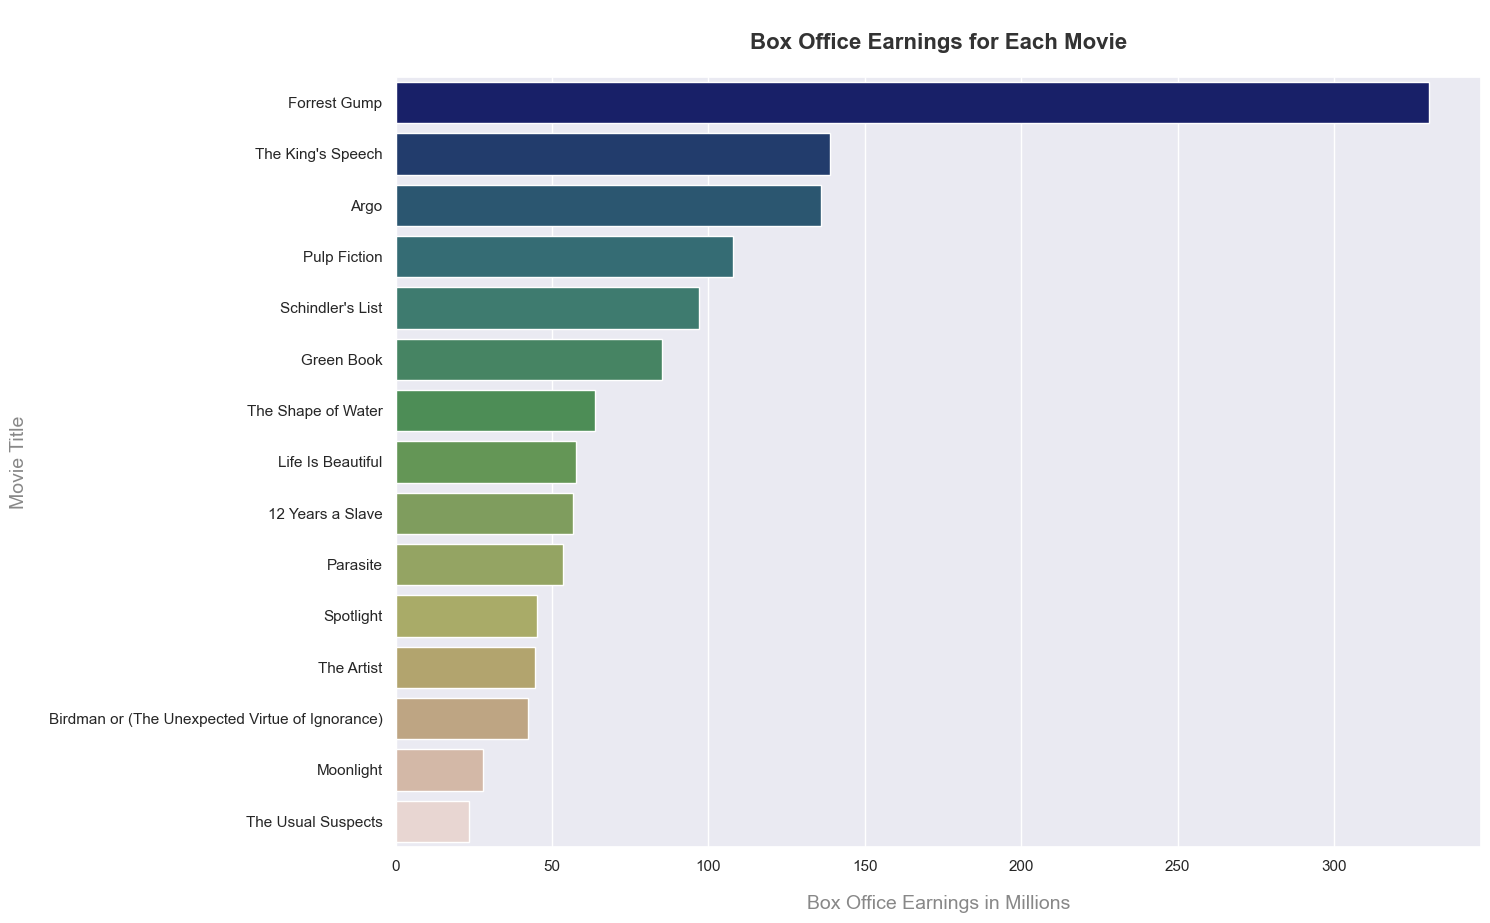

In [119]:
sorted_movies_df = movies_df.sort_values(by=BOX_OFFICE, ascending=False)

plt.figure(figsize=(14, 10))
chart = sns.barplot(y=MOVIE_TITLE, x=BOX_OFFICE_MIL, data=sorted_movies_df, 
                    palette='gist_earth')
plt.title('\nBox Office Earnings for Each Movie')
plt.xlabel(BOX_OFFICE_MIL)
plt.ylabel(MOVIE_TITLE)
plt.show()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h3 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Analysis - Exceeds 4/4</small>
### What is the total count of each genre present in the dataset? 

The vertical bar chart below shows the total count of each genre present in the dataset. The genre with the highest count is **Drama** with **15** movies, while the genre with the lowest count is a tie between **Fantasy** and **Mystery** with **1** movie each in the dataset.

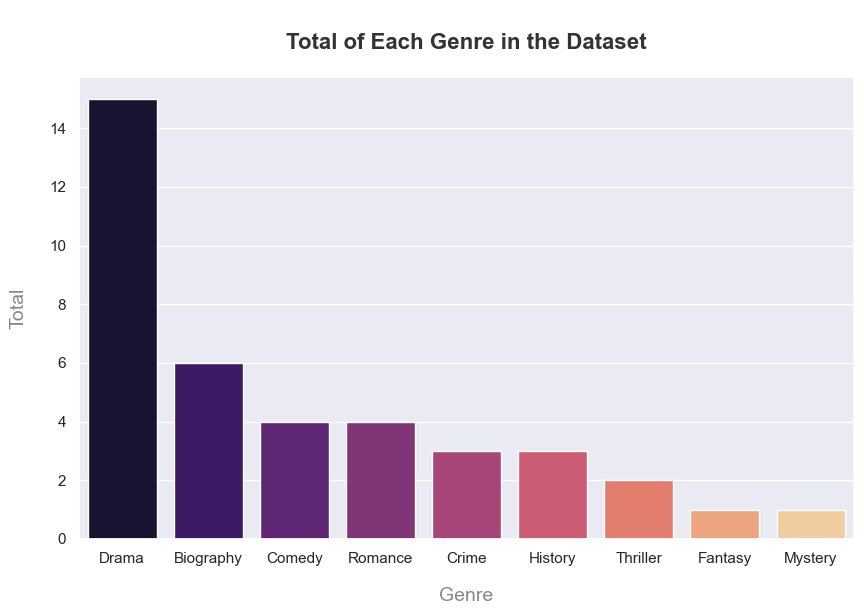

In [120]:
genre_counts = movies_df['Genre'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=genre_counts.values, x=genre_counts.index, palette="magma")
plt.title('\nTotal of Each Genre in the Dataset')
plt.ylabel('Total')
plt.xlabel('Genre')
plt.show()